In [614]:
# Using seaborn heatmaps

In [615]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns; sns.set()
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from utils.file_utils import save_pkl, load_pkl
from scipy.stats import percentileofscore

In [616]:
store_dir = "image_sets/"

drop_out = False
n_classes = 2
model_type = "clam_sb"
model_size = 'small'
exp_code = "exp_6" + "_s1"
ckpt_path = "s_0_checkpoint.pt"
results_dir = "image_sets/results"

data_dir = "image_sets/original/"
image_ext = ".tif"
patch_dir = "image_sets/patches/"
feat_dir = "image_sets/features/"
actual_feat_dir = "image_sets/patches/fungal_vs_nonfungal_resnet_features/pt_files/"

save_path = os.path.join(results_dir, exp_code, "heatmaps")
if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [617]:
heatmap_dict = load_pkl(os.path.join(results_dir, exp_code, "heatmap_dict.pkl"))

In [618]:
image_file = heatmap_dict[0]

image_name = image_file['filename']
attention_scores = image_file['attention_scores']
coords_list = image_file['coords_list']

print(image_name)

F005a02


In [619]:
ref = attention_scores.copy()
scores = []
percentiles = []
for score in attention_scores:
    percentile = percentileofscore(ref, score)
    score = score.item()
    percentiles.append(percentile/100)
    scores.append(score)
# print(attention_scores)
# print()
# print(scores)

scores = np.reshape(scores, [4, 6])
percentiles = np.reshape(percentiles, [4, 6])
# print()
# print(scores)

In [620]:
# df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# print(df)

# df = np.array([[1, 2, 4], [3, 4, 6], [1, 2, 4], [3, 4, 6]])
# print(df)

# df = pd.DataFrame(percentiles)
df = pd.DataFrame(scores)
print(df)

          0         1         2         3         4         5
0  0.969252  0.679750  1.310006  2.115945  2.063327  0.371219
1  2.216528  1.679969  1.261167  1.787701  1.268746  2.666544
2  2.045453  1.173868  1.653248  1.477193  2.064193  2.224571
3  2.155286  1.673484  1.525811  1.553528  1.213960  0.387639


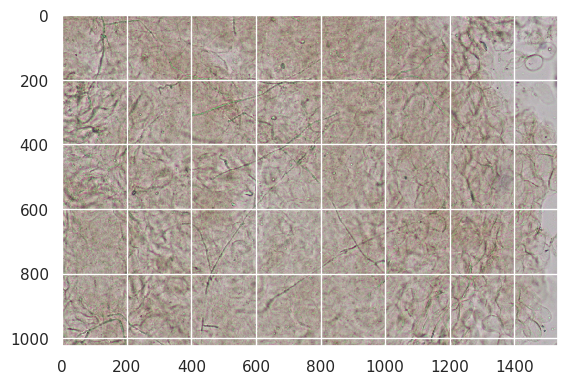

In [621]:
# img = np.array(Image.open(os.path.join(data_dir, image_name+image_ext)))
# plt.imshow(img)

map_img = mpimg.imread(os.path.join(data_dir, image_name+image_ext))
map_img = map_img[0:1024, 0:1536]
plt.imshow(map_img)

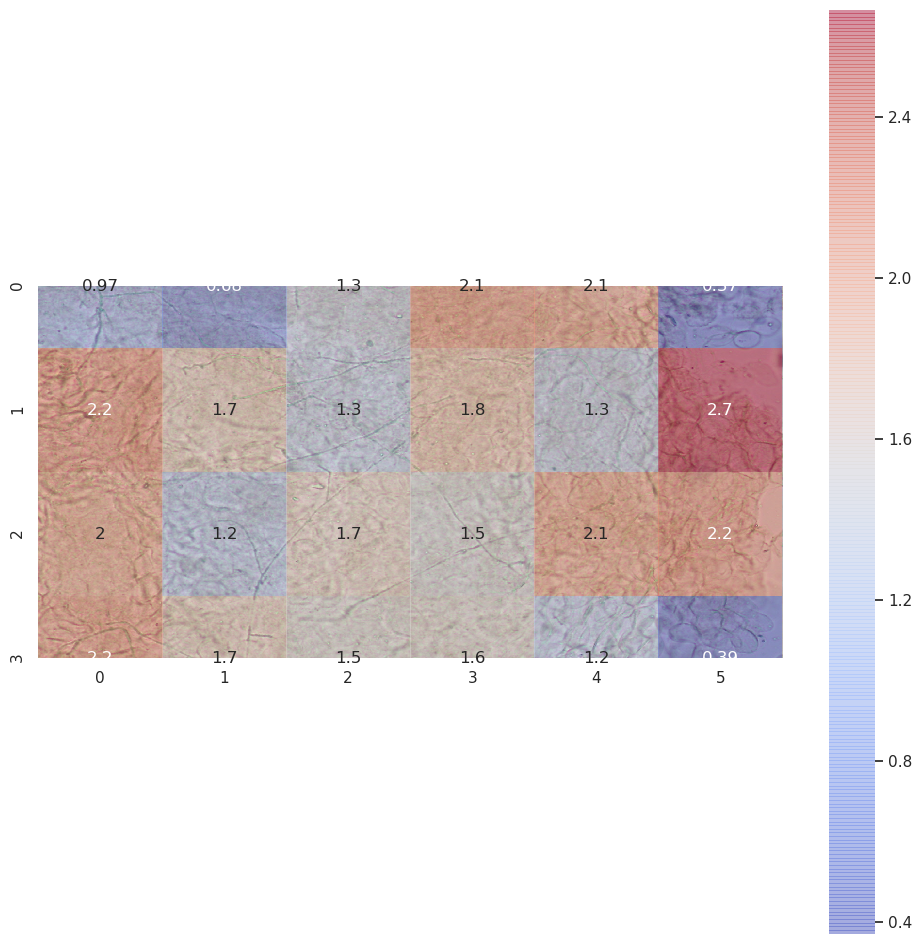

In [622]:
px = 1/72  # pixel in inches
# ax = plt.subplots(figsize=(1536*px, 1024*px)) # Doesn't seem to work in Jupyter NB.
ax = plt.subplots(figsize=(12, 12))
hmax = sns.heatmap(df,
            cmap = "coolwarm",
            alpha = 0.4, # whole heatmap is translucent
            annot = True,
            square = True,
            zorder = 2
            )
# hmax.set_ylim(sorted(hmax.get_xlim(), reverse=True))

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap

In [623]:
# save_name = 
# plt.savefig(save_name)